In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from keras.datasets import cifar10
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler

In [12]:
# load train and test dataset


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY



trainX, trainy, testX, testy = load_dataset()
train_dataX = trainX[0 : round(trainX.shape[0]  * 0.8)] 
train_dataY = trainy[0 : round(trainX.shape[0]  * 0.8)]
eval_dataX = trainX[round(trainX.shape[0] * 0.8):-1]
eval_dataY = trainy[round(trainX.shape[0] * 0.8):-1]

Epoch 1/60
625/625 [==============================] - 20s 30ms/step - loss: 1.5356 - accuracy: 0.4478 - val_loss: 1.3643 - val_accuracy: 0.5171
Epoch 2/60
625/625 [==============================] - 18s 29ms/step - loss: 1.1485 - accuracy: 0.5902 - val_loss: 0.9521 - val_accuracy: 0.6587
Epoch 3/60
625/625 [==============================] - 18s 28ms/step - loss: 0.9504 - accuracy: 0.6640 - val_loss: 0.8136 - val_accuracy: 0.7173
Epoch 4/60
625/625 [==============================] - 18s 28ms/step - loss: 0.8186 - accuracy: 0.7107 - val_loss: 0.7579 - val_accuracy: 0.7327
Epoch 5/60
625/625 [==============================] - 18s 29ms/step - loss: 0.7463 - accuracy: 0.7362 - val_loss: 0.7399 - val_accuracy: 0.7399
Epoch 6/60
625/625 [==============================] - 18s 28ms/step - loss: 0.6836 - accuracy: 0.7600 - val_loss: 0.6501 - val_accuracy: 0.7760
Epoch 7/60
625/625 [==============================] - 18s 29ms/step - loss: 0.6326 - accuracy: 0.7761 - val_loss: 0.6111 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 84.178



Training time: 450.7383542060852s
test loss:  0.47349777817726135
test acc:  84.17841792106628
confusion matrix:

 [[ 65 833   6   0   0   0   0   0   0  96]
 [  1 976   0   0   0   0   0   0   0  23]
 [ 16 833  24   0   0  51   0   3   0  73]
 [ 26 664   2  17   0 151   0   5   0 135]
 [ 17 784   3   7   0  68   0   9   0 112]
 [  8 573   2   4   0 301   0   4   0 108]
 [  7 705   2   5   0  92   0  13   0 176]
 [ 19 665   1   2   0  55   0  72   0 186]
 [ 21 702   0   0   0   0   0   1   1 275]
 [  0 417   0   0   0   1   0   0   0 582]]




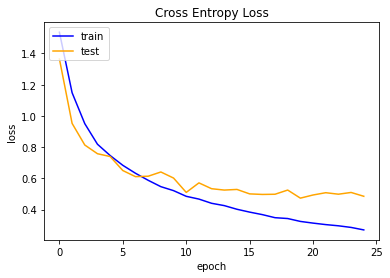

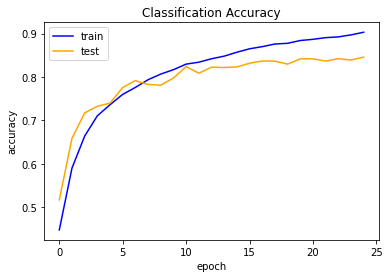

In [23]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

def define_model_baseline1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline3(dropout_percent):
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline4(dropout_percent):
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam()
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model



def summarize_diagnostics(history):
	# plot loss
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
	# plot accuracy
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.title('Classification Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')
	plt.show()
   


def run_test_harness():
	trainX, trainy, testX, testy = load_dataset()
	train_dataX = trainX[0 : round(trainX.shape[0]  * 0.8)] 
	train_dataY = trainy[0 : round(trainX.shape[0]  * 0.8)]
	eval_dataX = trainX[round(trainX.shape[0] * 0.8):-1]
	eval_dataY = trainy[round(trainX.shape[0] * 0.8):-1]
	# prepare pixel data
	train_dataX, eval_dataX = prep_pixels(train_dataX, eval_dataX)
	# define model
	model = define_model_baseline4(0.4)
 
	# fit model
	start = time.time()
	earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True,verbose=1) 
	history = model.fit(train_dataX, train_dataY, epochs=60, batch_size=64, validation_data=(eval_dataX, eval_dataY),callbacks =[earlystopping] ,verbose=1)
	stop = time.time()
  
# evaluate model
	score = model.evaluate(eval_dataX,eval_dataY, verbose=0)
	predicted = model.predict(testX)
	predicted=np.argmax(predicted, axis=1)
	Y_test=np.argmax(testy, axis=1)
	
	matrix = confusion_matrix(Y_test, predicted)
	f1=f1_score(Y_test, predicted,average='weighted')
	recall=recall_score(Y_test, predicted,average='weighted')
	precision=precision_score(Y_test, predicted,average='weighted')
	_, acc = model.evaluate(eval_dataX,eval_dataY, verbose=0)
	print('> %.3f' % (acc * 100.0))

	
	print("\n\n")
	print(f"Training time: {stop - start}s")
	print("test loss: ", score[0])
	print("test acc: ", score[1]*100)
	print("confusion matrix:\n\n",matrix)
	print("\n")

	
		# learning curves
	summarize_diagnostics(history)

run_test_harness()